### Importamos las dependencias necesarias para el proyecto

In [1]:
from os import error
import nltk
from nltk.util import pr
# nltk.download()
# nltk.download('punkt')
from nltk.corpus import cess_esp
from nltk.tag import hmm
from nltk.tag import tnt
from random import shuffle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import itertools
from numpy import sqrt

#### Función auxiliar que, dada una lista 'a' y un número 'n', devuelve una lista de listas con el contenido de 'a' en 'n' trozos

In [2]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

## EJERCICIO 1

In [3]:
corpus_sentences = cess_esp.tagged_sents()

procesed_sentences = []

for sentence in corpus_sentences:

    words = []

    for word in sentence:

        if ("*0*" not in word[0]):

            lenght = 2

            if (word[1][0].lower() == "v" or word[1][0].lower() == "f"):
                lenght = 3

            lenght = min(lenght, len(word[1]))

            words.append((word[0], word[1][0:lenght]))

    procesed_sentences.append(words)

train_size = int(len(procesed_sentences)*0.9)

train = procesed_sentences[0:train_size]
test = procesed_sentences[train_size:len(procesed_sentences)]

print("Dataset preview: " + str(procesed_sentences[0][0:10]))

print(f"\nOriginal dataset size: {len(procesed_sentences)}")
print(f"Train dataset size: {len(train)}")
print(f"Test dataset size: {len(test)}")

Dataset preview: [('El', 'da'), ('grupo', 'nc'), ('estatal', 'aq'), ('Electricité_de_France', 'np'), ('-Fpa-', 'Fpa'), ('EDF', 'np'), ('-Fpt-', 'Fpt'), ('anunció', 'vmi'), ('hoy', 'rg'), (',', 'Fc')]

Original dataset size: 6030
Train dataset size: 5427
Test dataset size: 603


## EJERCICIO 2

In [4]:
hmm_tagger = hmm.HiddenMarkovModelTagger.train(train)
tnt_tagger = tnt.TnT()
tnt_tagger.train(train)

hmm_eval = hmm_tagger.evaluate(test)
tnt_eval = tnt_tagger.evaluate(test)

phrase = "Al pasar la barca, me dijo el barquero"
tokens=nltk.word_tokenize(phrase,language='spanish')

print(f"HMM - Acc: {hmm_eval} ")
print(hmm_tagger.tag(tokens))
print(f"\nTnT - Acc: {tnt_eval} ")
print(tnt_tagger.tag(tokens))


HMM - Acc: 0.8784427571832664 
[('Al', 'sp'), ('pasar', 'vmn'), ('la', 'da'), ('barca', 'np'), (',', 'Fc'), ('me', 'pp'), ('dijo', 'vmi'), ('el', 'da'), ('barquero', 'nc')]

TnT - Acc: 0.8255173440524044 
[('Al', 'sp'), ('pasar', 'vmn'), ('la', 'da'), ('barca', 'Unk'), (',', 'Fc'), ('me', 'pp'), ('dijo', 'vmi'), ('el', 'da'), ('barquero', 'Unk')]


## EJERCICIO 3 - SIN SHUFFLING

In [5]:
partitions = 10

crossValData = list(split(procesed_sentences, partitions))

accs_hmm = []
accs_tnt = []
ic_hmm = []
ic_tnt = []


print("Cross-validation w/o shuffling\n")

for i in range(partitions):
    
    cross_test = crossValData[i]
    cross_train = list(itertools.chain.from_iterable([crossValData[j] for j in range(partitions) if i is not j]))

    numWordsTrain = 0
    
    for sentence in cross_train:
        for word in sentence:
            numWordsTrain += 1

    hmm_tagger = hmm.HiddenMarkovModelTagger.train(cross_train)
    tnt_tagger = tnt.TnT()
    tnt_tagger.train(cross_train)

    hmm_eval = hmm_tagger.evaluate(cross_test)
    tnt_eval = tnt_tagger.evaluate(cross_test)
    
    accs_hmm.append(hmm_eval)
    accs_tnt.append(tnt_eval)

    ic_hmm.append(1.96 *(sqrt((hmm_eval * (1-hmm_eval)) / numWordsTrain)))
    ic_tnt.append(1.96*(sqrt((tnt_eval * (1-tnt_eval)) / numWordsTrain)))
    

Cross-validation w/o shuffling



In [6]:
mean_hmm = sum(accs_hmm)/len(accs_hmm)
mean_tnt = sum(accs_hmm)/len(accs_hmm)
print(f"\t HMM mean Acc: {mean_hmm}")
print(f"\t TnT mean Acc: {mean_tnt}")


	 HMM mean Acc: 0.9049859134368964
	 TnT mean Acc: 0.9049859134368964


#### Hidden Markov Model

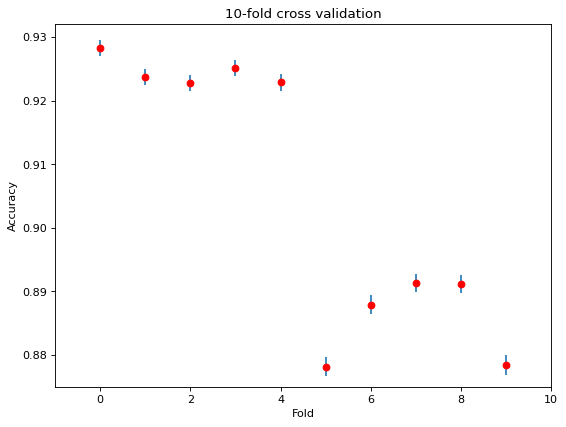

In [7]:
figure(figsize=(8, 6), dpi=80)
x=[i for i in range(partitions)]
y=accs_hmm
plt.axis([-1, 10, 0.875, 0.932])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(f"{partitions}-fold cross validation")
plt.plot(x,y,'ro')
plt.errorbar(x, y, yerr=ic_hmm, linestyle='None')
plt.show()

#### Trigrams’n’Tags

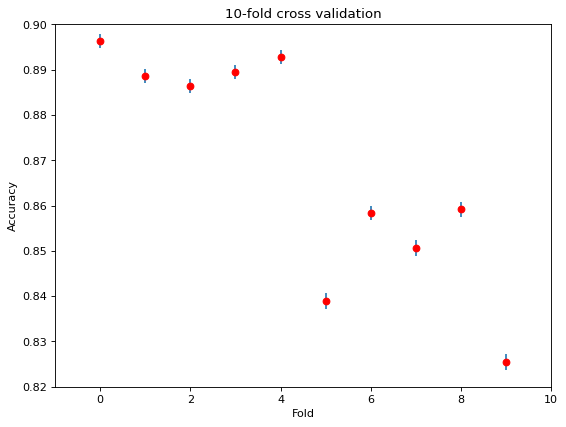

In [8]:
figure(figsize=(8, 6), dpi=80)
y=accs_tnt
plt.axis([-1, 10, 0.82, 0.90])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(f"{partitions}-fold cross validation")
plt.plot(x,y,'ro')
plt.errorbar(x, y, yerr=ic_tnt, linestyle='None')
plt.show()

## EJERCICIO 3 - CON SHUFFLING

In [9]:
partitions = 10

shuffle(procesed_sentences)

crossValData = list(split(procesed_sentences, partitions))

accs_hmm = []
accs_tnt = []
ic_hmm = []
ic_tnt = []


print("Cross-validation with shuffling\n")

for i in range(partitions):
    
    cross_test = crossValData[i]
    cross_train = list(itertools.chain.from_iterable([crossValData[j] for j in range(partitions) if i is not j]))

    numWordsTrain = 0
    
    for sentence in cross_train:
        for word in sentence:
            numWordsTrain += 1

    hmm_tagger = hmm.HiddenMarkovModelTagger.train(cross_train)
    tnt_tagger = tnt.TnT()
    tnt_tagger.train(cross_train)

    hmm_eval = hmm_tagger.evaluate(cross_test)
    tnt_eval = tnt_tagger.evaluate(cross_test)
    
    accs_hmm.append(hmm_eval)
    accs_tnt.append(tnt_eval)

    ic_hmm.append(1.96 *(sqrt((hmm_eval * (1-hmm_eval)) / numWordsTrain)))
    ic_tnt.append(1.96*(sqrt((tnt_eval * (1-tnt_eval)) / numWordsTrain)))
    

Cross-validation with shuffling



In [10]:
mean_hmm = sum(accs_hmm)/len(accs_hmm)
mean_tnt = sum(accs_hmm)/len(accs_hmm)
print(f"\t HMM mean Acc: {mean_hmm}")
print(f"\t TnT mean Acc: {mean_tnt}")

	 HMM mean Acc: 0.9262157166990741
	 TnT mean Acc: 0.9262157166990741


#### Hidden Markov Model

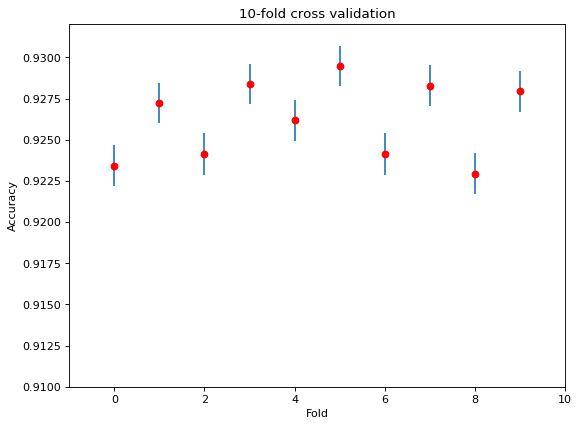

In [11]:
figure(figsize=(8, 6), dpi=80)
x=[i for i in range(partitions)]
y=accs_hmm
plt.axis([-1, 10, 0.91, 0.932])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(f"{partitions}-fold cross validation")
plt.plot(x,y,'ro')
plt.errorbar(x, y, yerr=ic_hmm, linestyle='None')
plt.show()

#### Trigrams’n’Tags

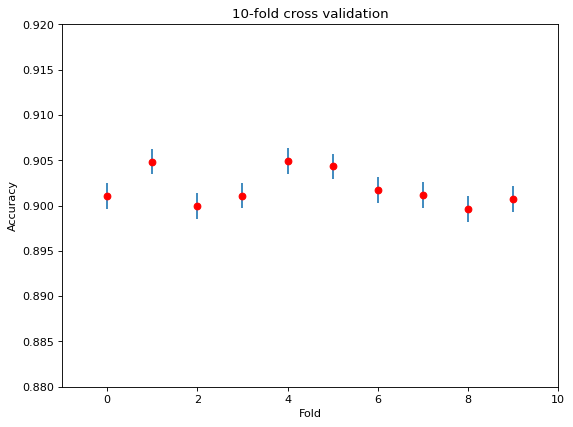

In [12]:
figure(figsize=(8, 6), dpi=80)
y=accs_tnt
plt.axis([-1, 10, 0.88, 0.92])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title(f"{partitions}-fold cross validation")
plt.plot(x,y,'ro')
plt.errorbar(x, y, yerr=ic_tnt, linestyle='None')
plt.show()